Model: "simple_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_1 (Dense)      │ (None, 64)            │        128 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_2 (Dense)      │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_3 (Dense)      │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ output_layer (Dense)        │ (None, 1)             │         65 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

10000
10000
total_n: 10000, train_n: 7000, val_n: 1000, test_n: 2000
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 226.5262 - mae: 12.6355 - val_loss: 62.2958 - val_mae: 7.5627
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0850 - mae: 0.7926 - val_loss: 18.5923 - val_mae: 3.8851
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1644 - mae: 0.2871 - val_loss: 14.0888 - val_mae: 3.3059
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0428 - mae: 0.1347 - val_loss: 11.9405 - val_mae: 2.9888
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0172 - mae: 0.0835 - val_loss: 10.7147 - val_mae: 2.7890
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0094 - mae: 0.0648 - val_loss: 10.6069 - val_mae: 2.7786
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - mae: 0.0528 - val_loss: 9.7550 - val_mae: 2.6291
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038 - mae: 0.0423 - val_l

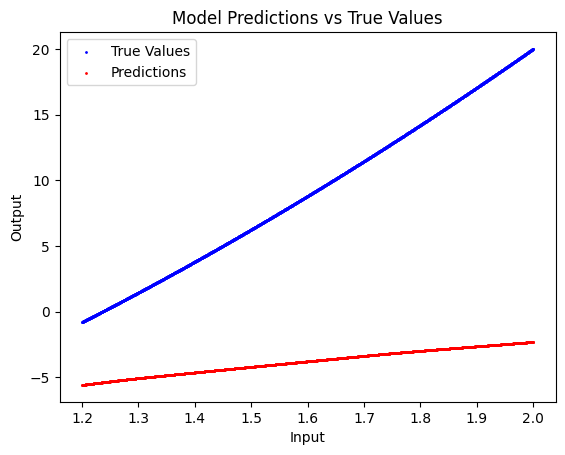

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Expected: 6.25, Predicted: -4.2049641609191895


In [ ]:
#--Import necessary modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

def main():
    model = build_model()
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Prepare data
    (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_val_test()

    # Train model
    model.fit(trainX, trainY, validation_data=(valX, valY), epochs=100, batch_size=32)

    # Plot: predictions vs actual (after training)
    preds = model.predict(testX)
    plt.scatter(testX, testY, label='True Values', color='blue', s=1)
    plt.scatter(testX, preds, label='Predictions', color='red', s=1)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Model Predictions vs True Values')
    plt.legend()
    plt.show()

    # Save the model
    model.save('PredictionModel.keras')

    # Test with a sample value
    testV = 1.5
    expected = polynomial_function(testV)
    predicted = model.predict(np.array([[testV]]))
    print(f"Expected: {expected}, Predicted: {predicted[0][0]}")

def prepare_train_val_test():
    x, y = data_process()
    total_n = len(x)
    train_n = int(total_n * 0.7)
    val_n = int(total_n * 0.1)
    test_n = int(total_n * 0.2)

    trainX = x[:train_n].reshape(-1, 1)
    trainY = y[:train_n].reshape(-1, 1)
    valX = x[train_n:train_n + val_n].reshape(-1, 1)
    valY = y[train_n:train_n + val_n].reshape(-1, 1)
    testX = x[train_n + val_n:].reshape(-1, 1)
    testY = y[train_n + val_n:].reshape(-1, 1)

    print('total_n: {}, train_n: {}, val_n: {}, test_n: {}'.format(total_n, len(trainX), len(valX), len(testX)))

    return (trainX, trainY), (valX, valY), (testX, testY)

def data_process():
    x = np.linspace(-2, 2, 10000)
    y = polynomial_function(x)
    print(len(x))
    print(len(y))
    return x, y

def polynomial_function(x):
    y = (5 * x**2) + (10 * x) - 20
    return y

def build_model():
    inputs = Input(shape=(1,), name="input_layer")
    h1 = Dense(64, activation='relu', name="hidden_layer_1")(inputs)
    h2 = Dense(128, activation='relu', name="hidden_layer_2")(h1)
    h3 = Dense(64, activation='relu', name="hidden_layer_3")(h2)
    outputs = Dense(1, name="output_layer")(h3)
    model = Model(inputs=inputs, outputs=outputs, name="simple_model")
    model.summary(show_trainable=True)
    return model

if __name__ == '__main__':
    main()